**Loading** **Packages**

In [ ]:
# Import relevant Python packages
!pip install pingouin
import matplotlib.pyplot as plt        # visualization
import numpy as np                     # matrices and high-level math functions
import pandas as pd                    # data manipulation
import seaborn as sns                  # visualization (based on matplotlib)
from scipy import stats
from pingouin import ancova

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=00ed6a7fc311291643296d83b12d9afd79ee40dad91e9f6e2e7de7067fef7388
  Stored in directory: /root/.cache/pip/wheels/04/bb/0d/2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils


**Import dataset**

In [ ]:
df1 = pd.read_csv("Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv") # Original dataset - Make sure to have dataset uploaded
df1.head(15)

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5
5,2021,Apr-June,1019145,6060688.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,42,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,6
6,2021,Jan-Mar,1035445,6053833.0,330778,Black,M,Aged 25 to 34 years,Not a youth,52,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,7
7,2021,Jan-Mar,1050464,6063477.0,330778,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,8
8,2021,Jan-Mar,1045486,6053929.0,330778,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,9
9,2021,Apr-June,1012287,6004570.0,330778,Black,M,Aged 25 to 34 years,Not a youth,14,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,10


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65276 entries, 0 to 65275
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Arrest_Year                      65276 non-null  int64  
 1   Arrest_Month                     65276 non-null  object 
 2   EventID                          65276 non-null  int64  
 3   ArrestID                         64807 non-null  float64
 4   PersonID                         65276 non-null  int64  
 5   Perceived_Race                   65272 non-null  object 
 6   Sex                              65276 non-null  object 
 7   Age_group__at_arrest_            65252 non-null  object 
 8   Youth_at_arrest__under_18_years  65276 non-null  object 
 9   ArrestLocDiv                     65276 non-null  object 
 10  StripSearch                      65276 non-null  int64  
 11  Booked                           65276 non-null  int64  
 12  Occurrence_Categor

In [ ]:
df1.describe()

,Arrest_Year,EventID,ArrestID,PersonID,StripSearch,Booked,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
count,65276.000000,6.527600e+04,6.480700e+04,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,7801.000000,7801.000000,7801.000000,7801.000000,7801.000000,65276.000000
mean,2020.510096,1.029998e+06,6.032402e+06,318599.919695,0.119508,0.519502,0.004075,0.044136,0.038330,0.033381,0.006358,0.445937,0.765671,0.343161,0.453403,0.418921,0.373157,32638.500000
std,0.499902,1.731809e+04,1.870751e+04,10815.387928,0.324388,0.499623,0.063706,0.205398,0.191992,0.179632,0.079481,0.497072,0.423606,0.474795,0.497856,0.493414,0.483674,18843.702423
min,2020.000000,1.000000e+06,6.000000e+06,300000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2020.000000,1.015001e+06,6.016202e+06,309215.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,16319.750000
50%,2021.000000,1.030006e+06,6.032402e+06,318595.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,32638.500000
75%,2021.000000,1.044996e+06,6.048602e+06,327926.250000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48957.250000
max,2021.000000,1.060002e+06,6.064804e+06,337346.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65276.000000


**Data Exploration and Preprocessing**

**Table 1 - Strip search by race and group**

In [ ]:
strip = df1.groupby(['Arrest_Year','Perceived_Race','Age_group__at_arrest_'])['StripSearch'].sum().reset_index()

In [ ]:
strip

,Arrest_Year,Perceived_Race,Age_group__at_arrest_,StripSearch
0,2020,Black,Aged 17 years and younger,147
1,2020,Black,Aged 18 to 24 years,596
2,2020,Black,Aged 25 to 34 years,807
3,2020,Black,Aged 35 to 44 years,427
4,2020,Black,Aged 45 to 54 years,175
...,...,...,...,...
107,2021,White,Aged 25 to 34 years,116
108,2021,White,Aged 35 to 44 years,135
109,2021,White,Aged 45 to 54 years,33
110,2021,White,Aged 55 to 64 years,12


**Table 2 - Strip search by race**

In [ ]:
strip_race = df1.groupby(['Arrest_Year','Perceived_Race'])['StripSearch'].sum()

In [ ]:
print(strip_race)

Arrest_Year  Perceived_Race      
2020         Black                   2223
             East/Southeast Asian     295
             Indigenous               286
             Latino                   126
             Middle-Eastern           206
             South Asian              241
             Unknown or Legacy        497
             White                   3240
2021         Black                    211
             East/Southeast Asian      46
             Indigenous                20
             Latino                     6
             Middle-Eastern            22
             South Asian               16
             Unknown or Legacy         39
             White                    326
Name: StripSearch, dtype: int64


**Table 3 - Booked by race and age group**

In [ ]:
booked = df1.groupby(['Arrest_Year','Perceived_Race','Age_group__at_arrest_'])['Booked'].sum().reset_index()
booked

,Arrest_Year,Perceived_Race,Age_group__at_arrest_,Booked
0,2020,Black,Aged 17 years and younger,332
1,2020,Black,Aged 18 to 24 years,1181
2,2020,Black,Aged 25 to 34 years,1798
3,2020,Black,Aged 35 to 44 years,954
4,2020,Black,Aged 45 to 54 years,426
...,...,...,...,...
107,2021,White,Aged 25 to 34 years,2205
108,2021,White,Aged 35 to 44 years,2152
109,2021,White,Aged 45 to 54 years,1251
110,2021,White,Aged 55 to 64 years,571


**Table 4 - Dataframe combining Strip search and Booked by race and age group**

In [ ]:
table = df1.groupby(['Arrest_Year','Perceived_Race','Age_group__at_arrest_'])['StripSearch','Booked'].sum().reset_index()
table

<ipython-input-10-056b02dc20db>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  table = df1.groupby(['Arrest_Year','Perceived_Race','Age_group__at_arrest_'])['StripSearch','Booked'].sum().reset_index()


,Arrest_Year,Perceived_Race,Age_group__at_arrest_,StripSearch,Booked
0,2020,Black,Aged 17 years and younger,147,332
1,2020,Black,Aged 18 to 24 years,596,1181
2,2020,Black,Aged 25 to 34 years,807,1798
3,2020,Black,Aged 35 to 44 years,427,954
4,2020,Black,Aged 45 to 54 years,175,426
...,...,...,...,...,...
107,2021,White,Aged 25 to 34 years,116,2205
108,2021,White,Aged 35 to 44 years,135,2152
109,2021,White,Aged 45 to 54 years,33,1251
110,2021,White,Aged 55 to 64 years,12,571


In [ ]:
total = df1['PersonID'].count()
print(total)

65276


In [ ]:
df = table # Renaming the table as the main dataframe for easy calculations

In [ ]:
df.shape #112 individual arrested and search with 5 colomuns 

(112, 5)

In [ ]:
df.describe()

,Arrest_Year,StripSearch,Booked
count,112.000000,112.000000,112.000000
mean,2020.500000,69.642857,302.723214
std,0.502247,180.330021,493.737852
min,2020.000000,0.000000,2.000000
25%,2020.000000,2.000000,41.500000
50%,2020.500000,9.500000,136.500000
75%,2021.000000,54.000000,273.000000
max,2021.000000,1164.000000,2275.000000


In [ ]:
# Print out the data type of each feature in the dataset
print("Data type of each feature:")
df.dtypes

Data type of each feature:


Arrest_Year               int64
Perceived_Race           object
Age_group__at_arrest_    object
StripSearch               int64
Booked                    int64
dtype: object

In [ ]:
# Determine if there are any missing datapoints or duplicate rows in the dataset
print("\nAre there any missing datapoints in the dataset?", df.isnull().values.any())
print("Number of duplicated rows:", df.duplicated().sum())


Are there any missing datapoints in the dataset? False
Number of duplicated rows: 0


In [ ]:
#check missing values
df.isna().sum()

Arrest_Year              0
Perceived_Race           0
Age_group__at_arrest_    0
StripSearch              0
Booked                   0
dtype: int64

### **Data Visualization**

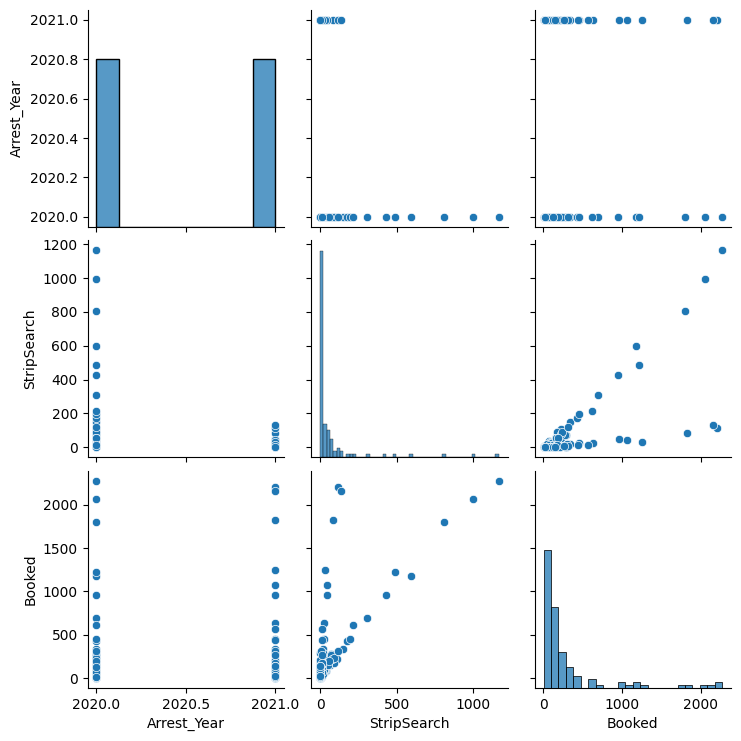

In [ ]:
sns.pairplot(df) #Plot the relationship between the variables

<ipython-input-19-696194f5f7c2>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Blues', annot=True);


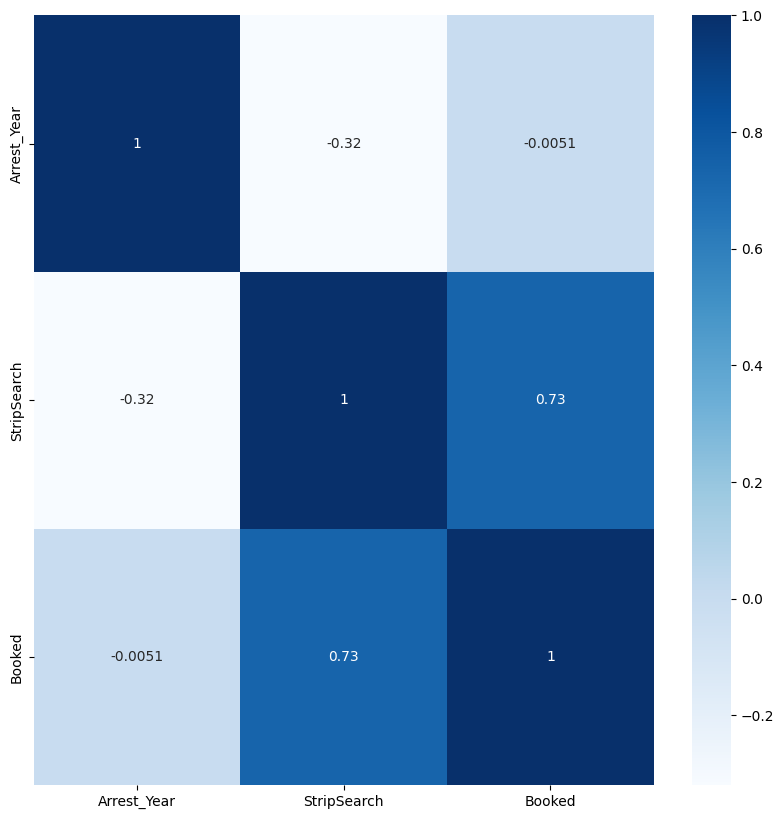

In [ ]:
# Use a heatmap to check for collinearity between variables
# A higher (darker) value represents higher correlation between two variables
# A lower (lighter) value represents lower correlation between two variables
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='Blues', annot=True);

<ipython-input-20-c09f0bee49ac>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['StripSearch'], ax=axes[0, 2], hist=True, kde=True)
<ipython-input-20-c09f0bee49ac>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Booked'], ax=axes[0, 3], hist=True, kde=True)


<Axes: xlabel='Booked', ylabel='Density'>

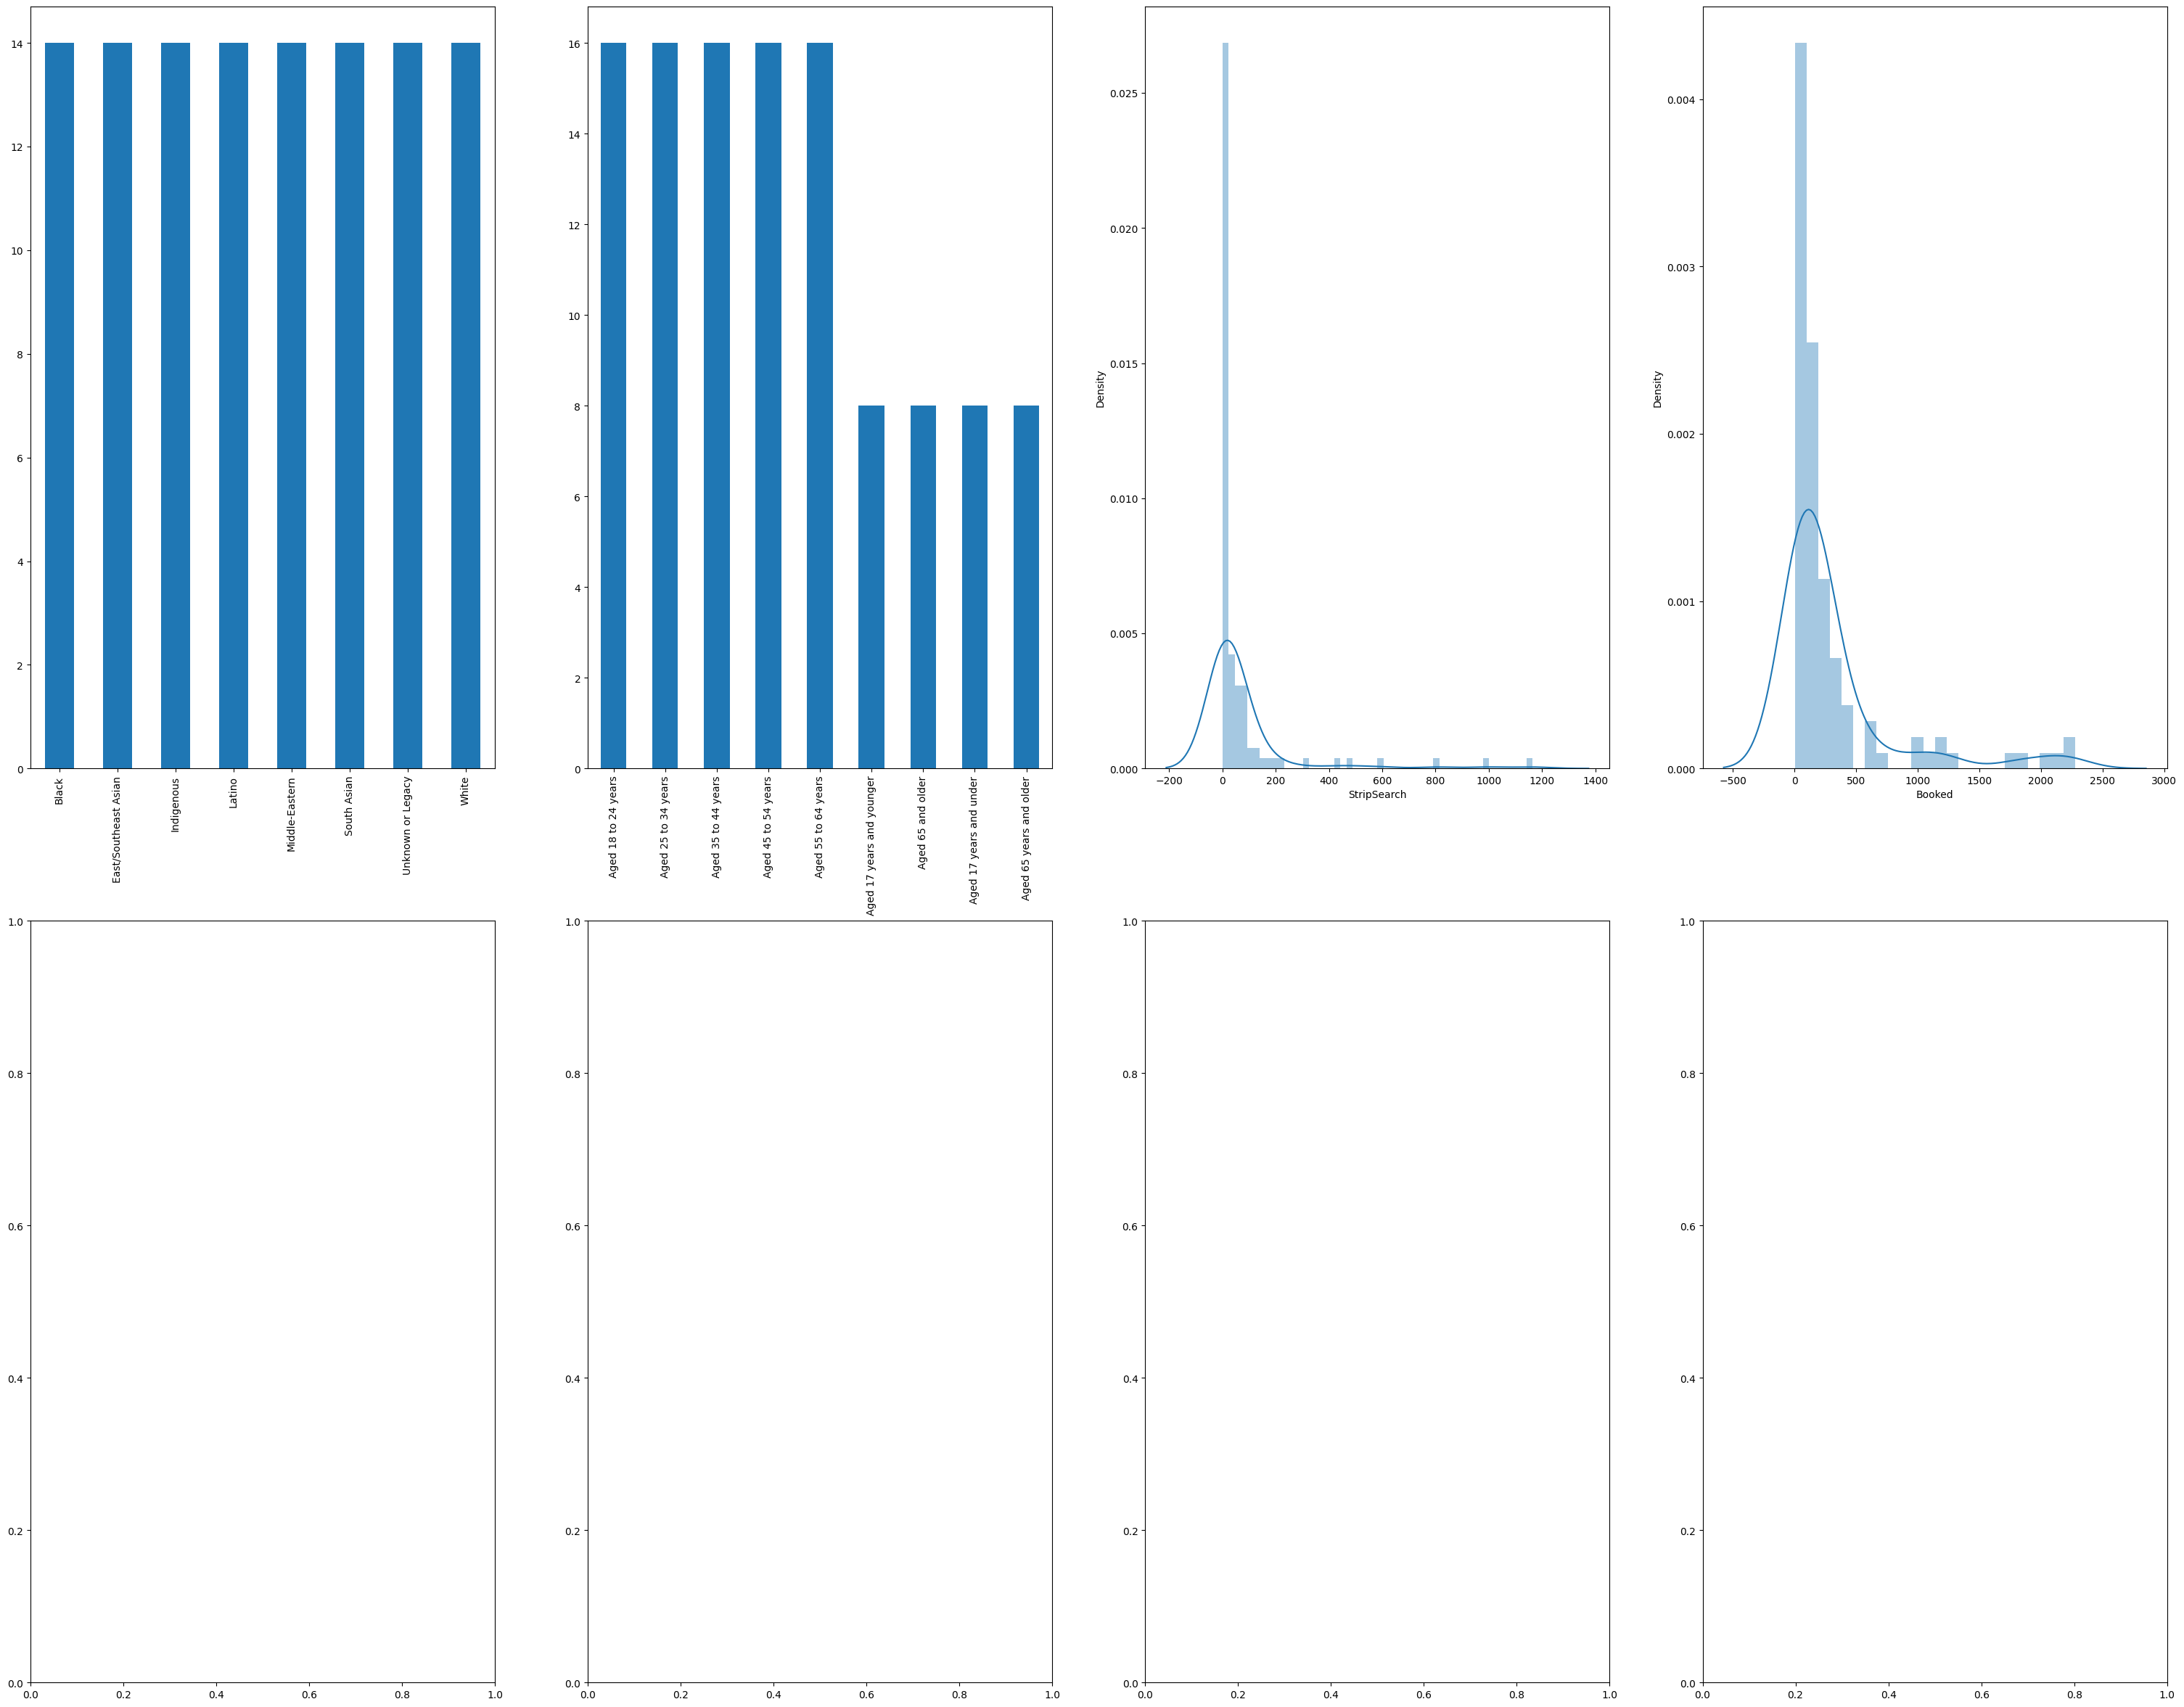

In [ ]:
#  Plot distribution plot of the distribution of each Offenders in different varible regions
#  'Perceived_Race'.
fig, axes = plt.subplots(2, 4, figsize=(38, 30))
pr = df['Perceived_Race'].value_counts()
pr.plot(kind='bar', ax=axes[0, 0])
age = df['Age_group__at_arrest_'].value_counts()
age.plot(kind='bar', ax=axes[0, 1])
sns.distplot(df['StripSearch'], ax=axes[0, 2], hist=True, kde=True)
sns.distplot(df['Booked'], ax=axes[0, 3], hist=True, kde=True)


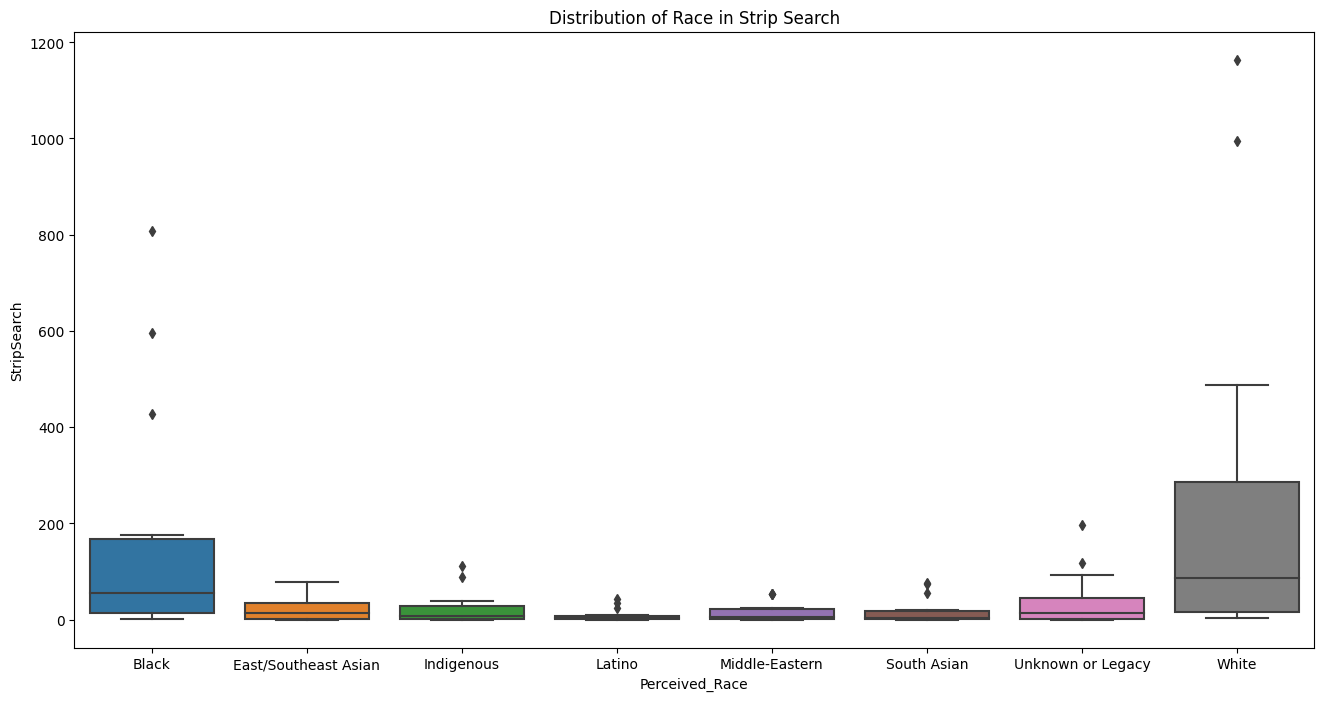

In [ ]:
# Create a new figure with a larger size
plt.figure(figsize=(16, 8))


plt.title('Distribution of Race in Strip Search')

# Create a boxplot of strip searches by race
sns.boxplot(x='Perceived_Race', y='StripSearch', data= strip)


# Show the plot
plt.show()



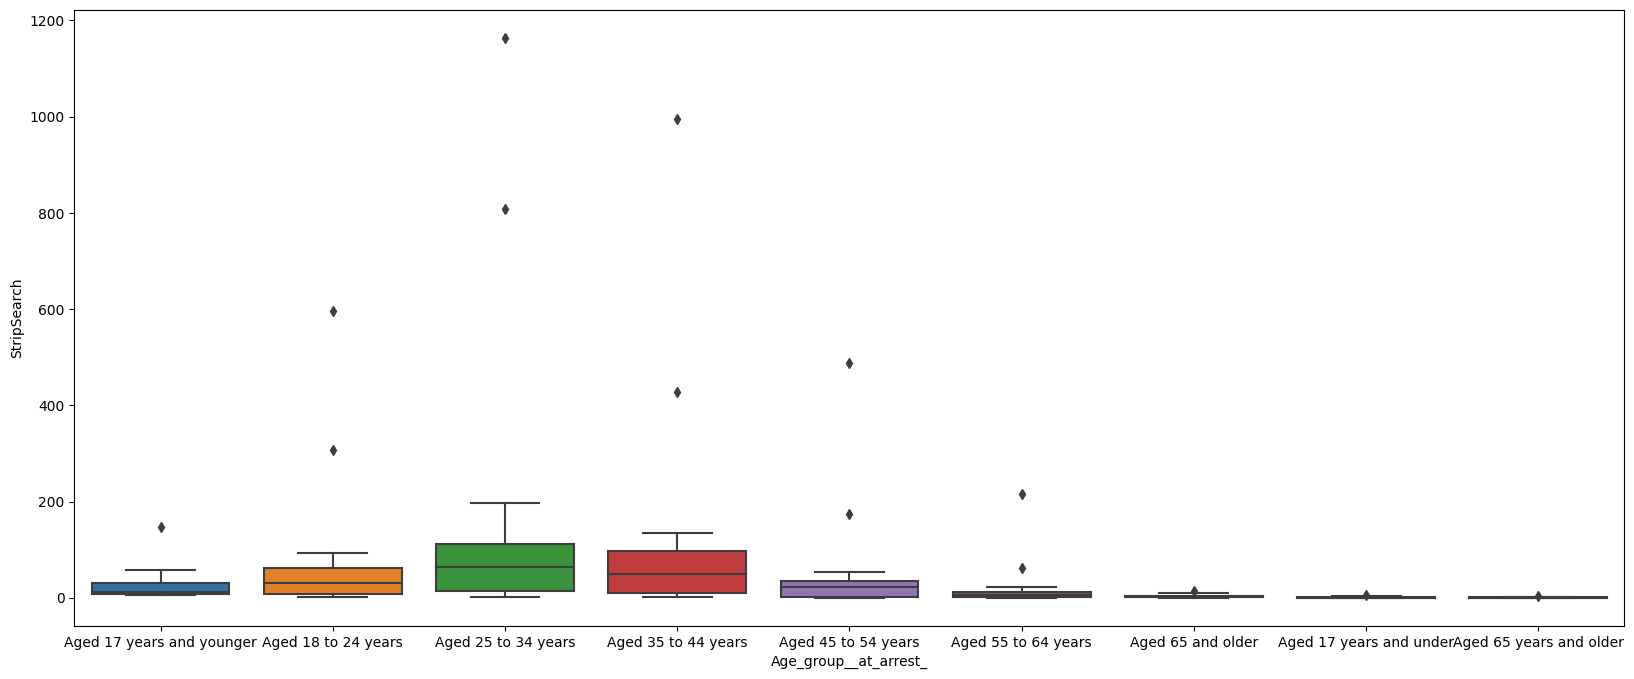

In [ ]:
# Create a new figure with a larger size
plt.figure(figsize=(20, 8))

# Create a boxplot of strip searches by age
sns.boxplot(x='Age_group__at_arrest_', y='StripSearch', data= strip)

# Show the plot
plt.show()

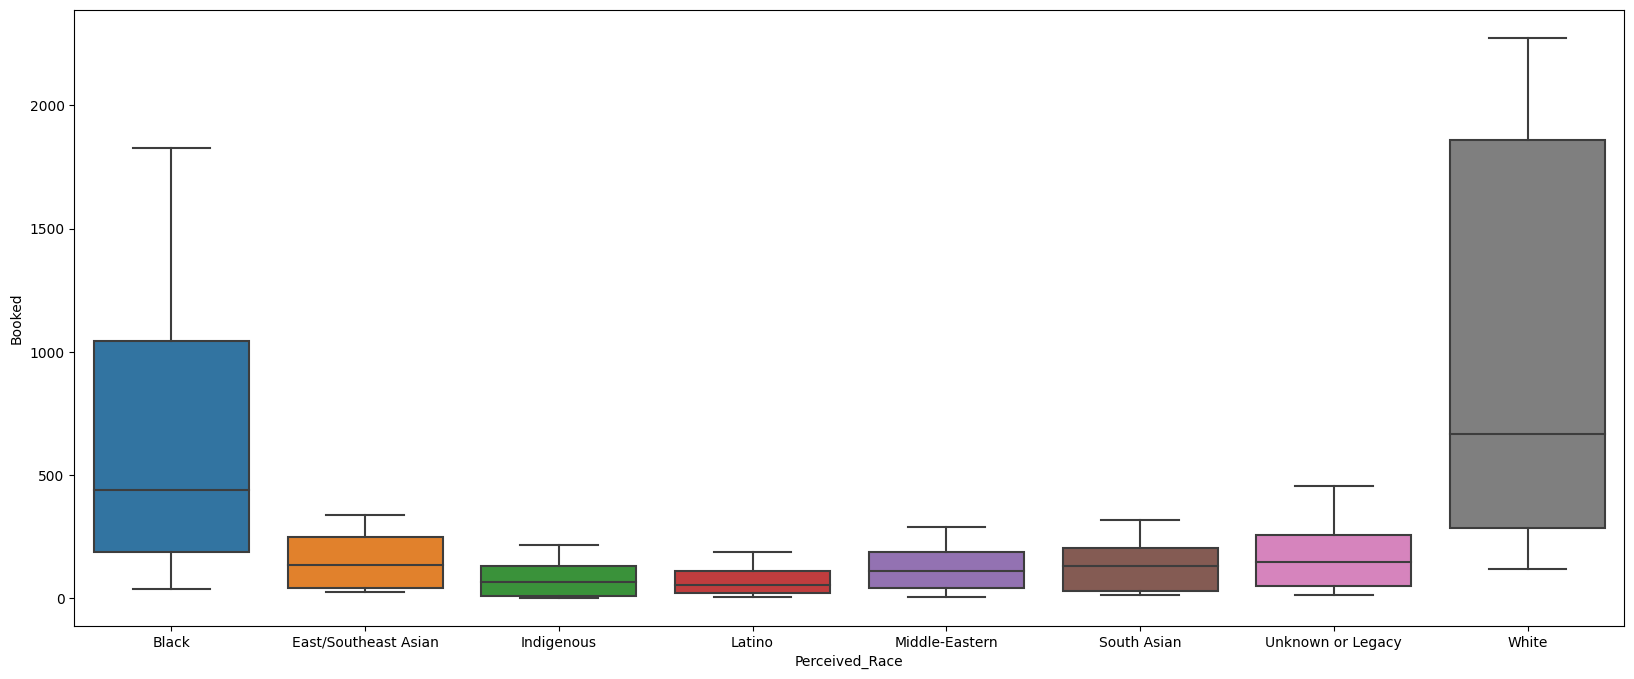

In [ ]:
# Create a new figure with a larger size
plt.figure(figsize=(20, 8))

# Create a boxplot of booked by race
sns.boxplot(x='Perceived_Race', y='Booked', data= booked)

# Show the plot
plt.show()

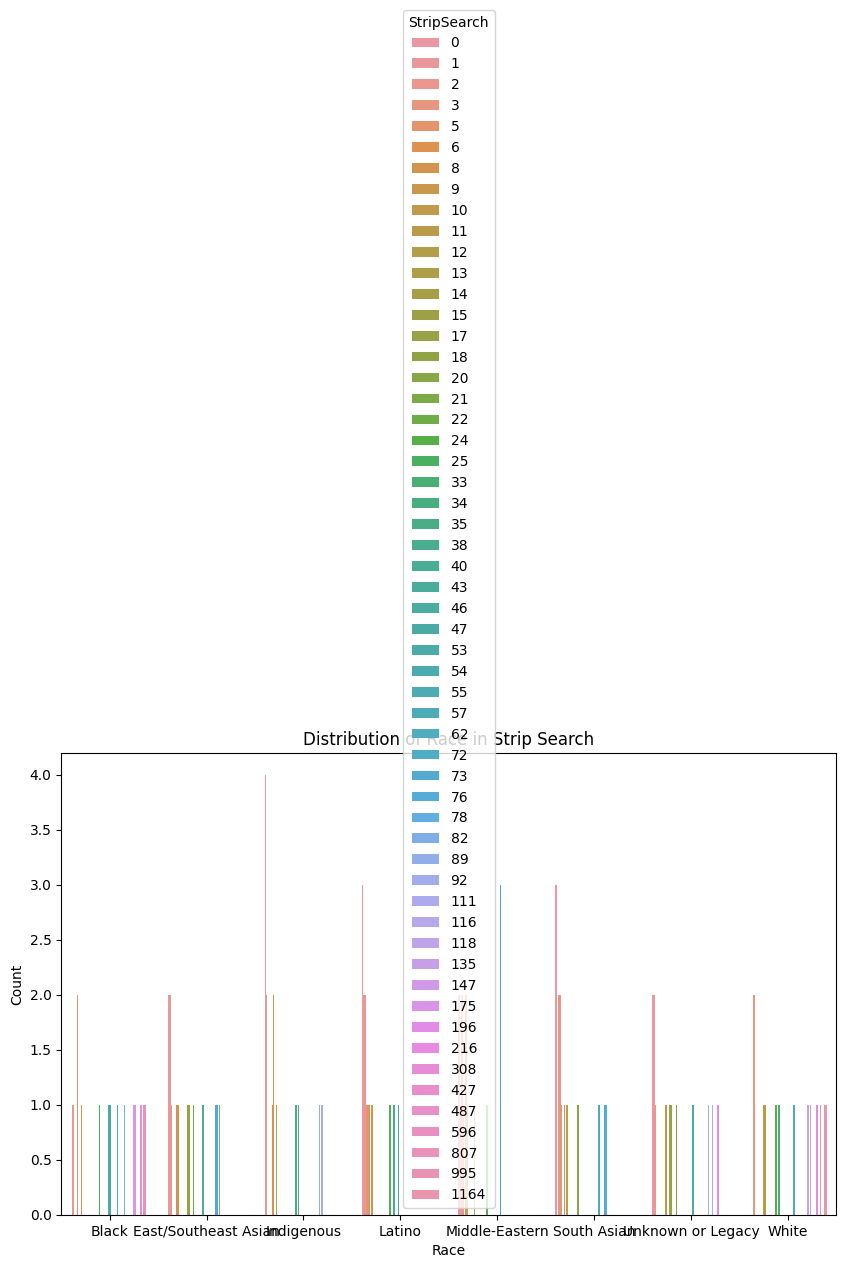

In [ ]:
# The number of instances of strip search for each race category
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Perceived_Race', hue='StripSearch')
plt.title('Distribution of Race in Strip Search')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

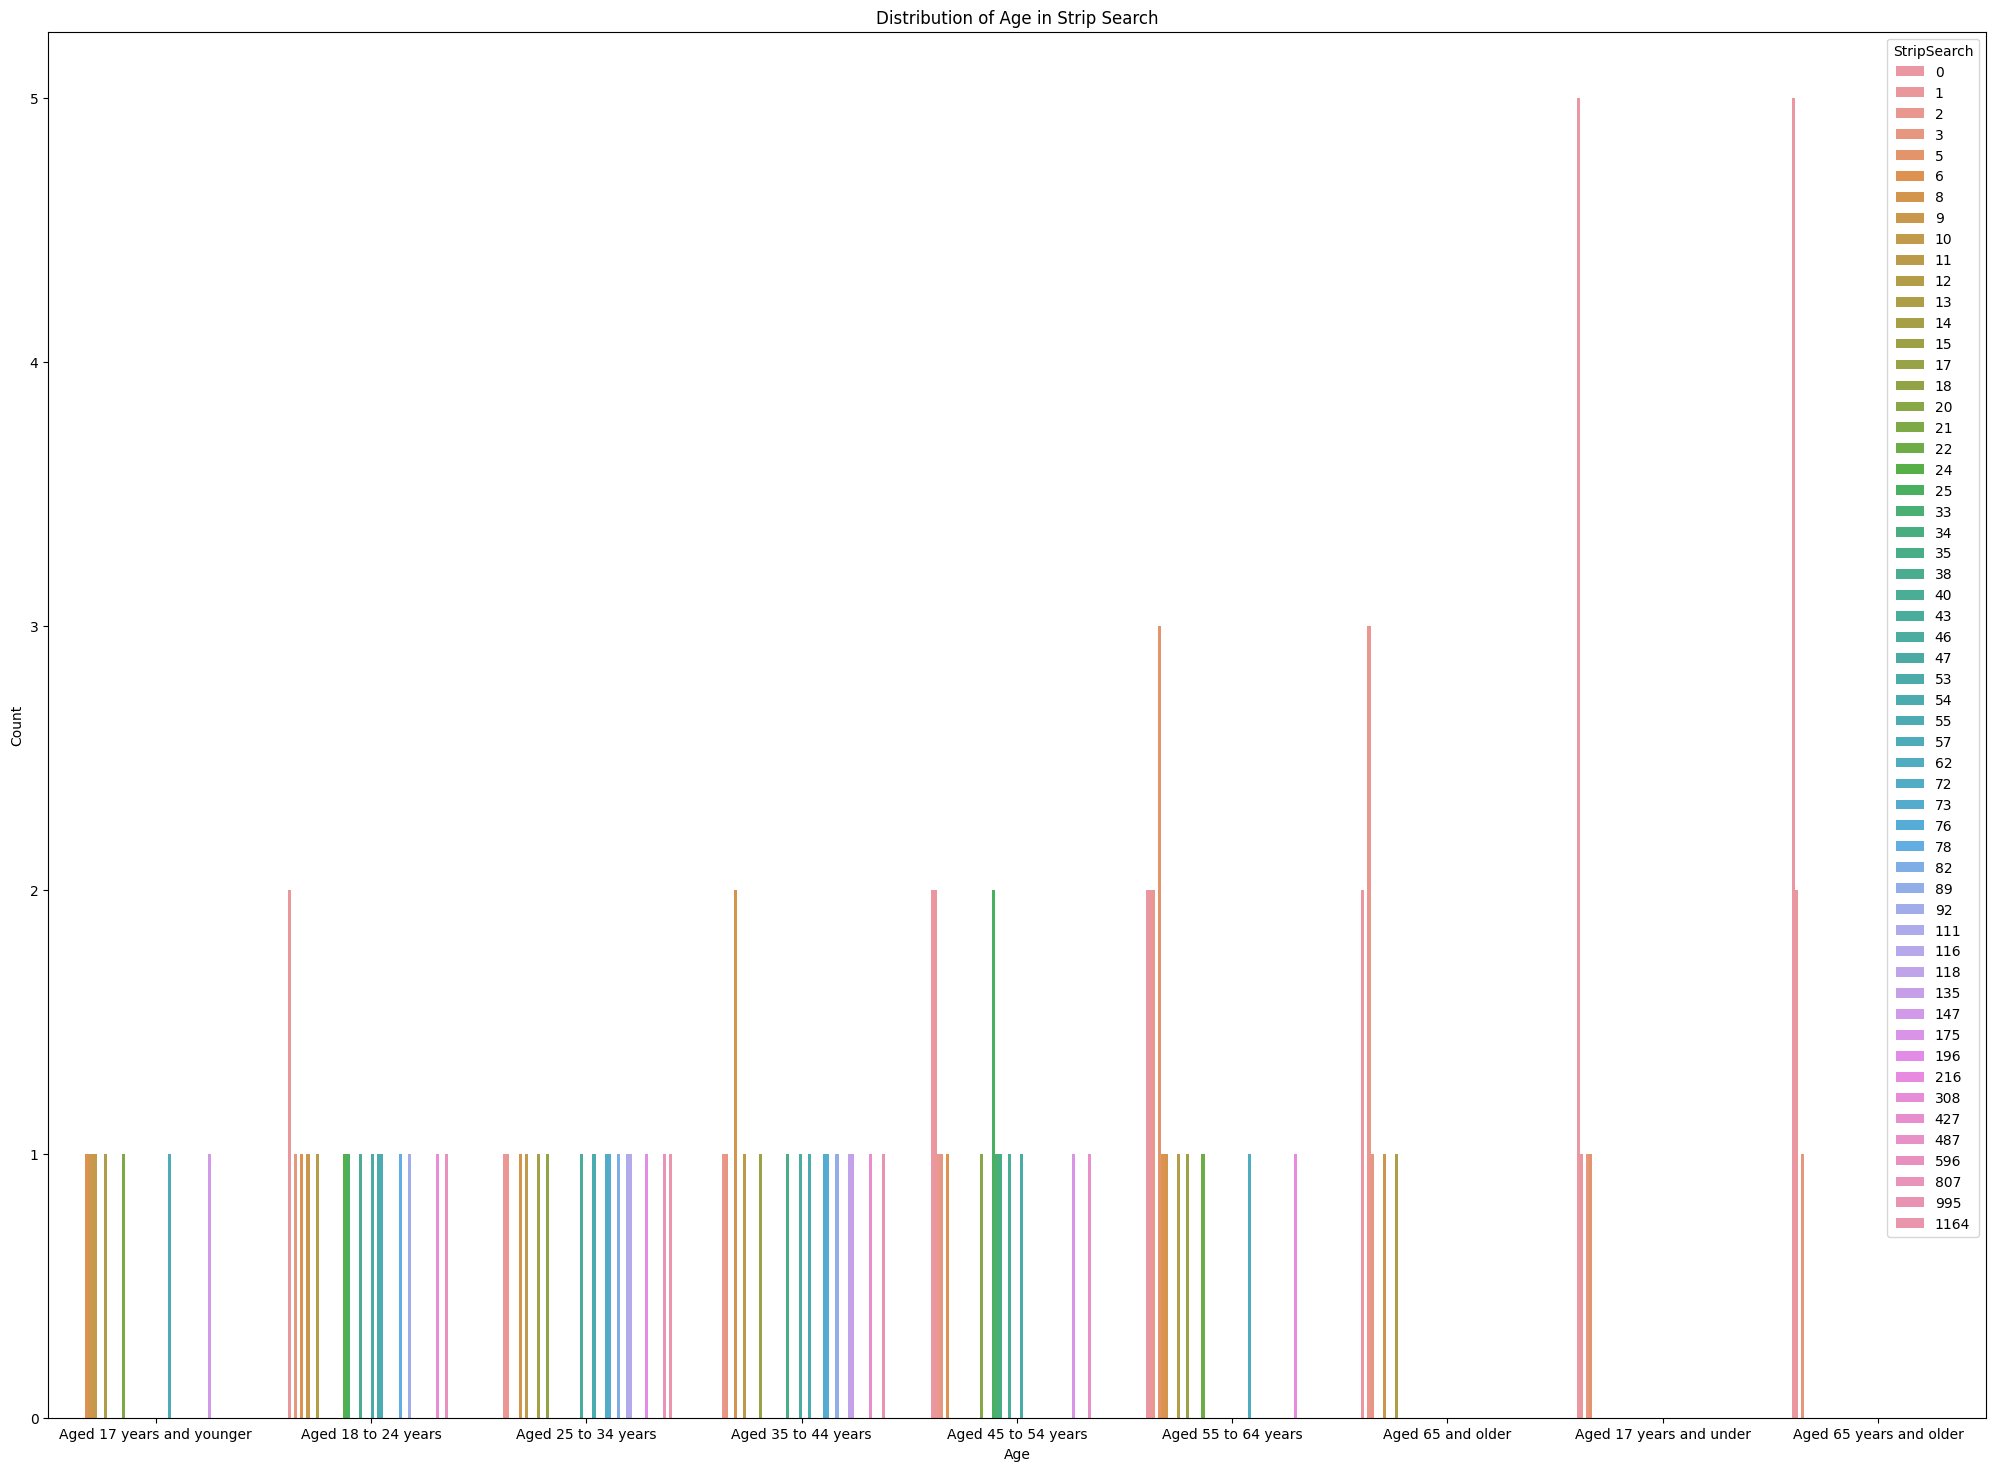

In [ ]:
# The number of instances of strip search for each age group
plt.figure(figsize=(25, 18))
sns.countplot(data=df, x='Age_group__at_arrest_', hue='StripSearch')
plt.title('Distribution of Age in Strip Search')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**T-Tests & ANOVA**

In [ ]:
strip1 = df1.groupby(['Arrest_Year','Arrest_Month','Sex','Perceived_Race','Age_group__at_arrest_'])['StripSearch'].sum().reset_index()
print(strip1)

     Arrest_Year Arrest_Month Sex Perceived_Race      Age_group__at_arrest_  \
0           2020     Apr-June   F          Black  Aged 17 years and younger   
1           2020     Apr-June   F          Black        Aged 18 to 24 years   
2           2020     Apr-June   F          Black        Aged 25 to 34 years   
3           2020     Apr-June   F          Black        Aged 35 to 44 years   
4           2020     Apr-June   F          Black        Aged 45 to 54 years   
..           ...          ...  ..            ...                        ...   
858         2021      Oct-Dec   M          White        Aged 25 to 34 years   
859         2021      Oct-Dec   M          White        Aged 35 to 44 years   
860         2021      Oct-Dec   M          White        Aged 45 to 54 years   
861         2021      Oct-Dec   M          White        Aged 55 to 64 years   
862         2021      Oct-Dec   M          White    Aged 65 years and older   

     StripSearch  
0              3  
1            

In [ ]:
strip1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Arrest_Year            863 non-null    int64 
 1   Arrest_Month           863 non-null    object
 2   Sex                    863 non-null    object
 3   Perceived_Race         863 non-null    object
 4   Age_group__at_arrest_  863 non-null    object
 5   StripSearch            863 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 40.6+ KB


In [ ]:
#data
popmean = strip1['StripSearch'].mean() #Population mean
print(popmean)
sample_size = strip1['Perceived_Race'].value_counts()['Black'] #Sample size
print(sample_size)
x_bar = strip1.loc[strip1['Perceived_Race'] == 'Black', 'StripSearch'].mean() #Sample mean
print(x_bar)
std= np.std(strip1.loc[strip1['Perceived_Race'] == 'Black', 'StripSearch']) #Sample standard deviation
print(std)
sem = std / np.sqrt(sample_size) # standard error for the mean
print(sem)

9.038238702201623
110
22.12727272727273
48.678184229023074
4.64128275747783


In [ ]:
#performing a two sided one sample t-test for Black arrest
statistic, pvalue = stats.ttest_1samp(strip1.loc[strip1['Perceived_Race'] == 'Black', 'StripSearch'], popmean)
print(f'p = {pvalue:5.3f}')

p = 0.006


In [ ]:
#performing a two sided one sample t-test for Black arrest
statistic, pvalue = stats.ttest_1samp(strip1.loc[strip1['Perceived_Race'] == 'Black', 'StripSearch'], popmean, alternative = 'greater')
print(f'p = {pvalue:5.3f}')

p = 0.003


In [ ]:
#performing a two sided one sample t-test for Latino arrest
statistic, pvalue = stats.ttest_1samp(strip1.loc[strip1['Perceived_Race'] == 'Latino', 'StripSearch'], popmean)
print(f'p = {pvalue:5.3f}')

p = 0.000


In [ ]:
#performing a two sided one sample t-test for Latino arrest
statistic, pvalue = stats.ttest_1samp(strip1.loc[strip1['Perceived_Race'] == 'Latino', 'StripSearch'], popmean, alternative = 'greater')
print(f'p = {pvalue:5.3f}')

p = 1.000


In [ ]:
#performing a two sided one sample t-test for Indigenous arrest
statistic, pvalue = stats.ttest_1samp(strip1.loc[strip1['Perceived_Race'] == 'Indigenous', 'StripSearch'], popmean)
print(pvalue)

6.010471869305242e-15


In [ ]:
#performing a two sided one sample t-test for Indigenous arrest
statistic, pvalue = stats.ttest_1samp(strip1.loc[strip1['Perceived_Race'] == 'Indigenous', 'StripSearch'], popmean, alternative = 'greater')
print(f'p = {pvalue:5.3f}')

p = 1.000


In [ ]:
#performing a two sided one sample t-test for White arrest
statistic, pvalue = stats.ttest_1samp(strip1.loc[strip1['Perceived_Race'] == 'Middle-Eastern', 'StripSearch'], popmean)
print(f'p = {pvalue:5.3f}')

p = 0.000


In [ ]:
#performing a two sided one sample t-test for White arrest
statistic, pvalue = stats.ttest_1samp(strip1.loc[strip1['Perceived_Race'] == 'Middle-Eastern', 'StripSearch'], popmean, alternative = 'greater')
print(f'p = {pvalue}')

p = 1.0


In [ ]:
# Confidence level
alpha = 0.05  # 95% confidence
# Degrees of freedom
dof = sample_size - 1
# Percent-point function (aka quantile function) of the t-distribution
t = stats.t.ppf(1 - (alpha / 2), dof)
# Margin of error
d = t * sem
# Intervals
upper_ci = x_bar + d
lower_ci = x_bar - d

print(f'Sample mean = {x_bar:.2f}, 95% CI [{lower_ci:.2f}, {upper_ci:.2f}]')

Sample mean = 22.13, 95% CI [12.93, 31.33]


In [ ]:
print(f'You can be 95% confident that the range {lower_ci:.2f} to {upper_ci:.2f} contains the true population mean')

You can be 95% confident that the range 12.93 to 31.33 contains the true population mean


Assumptions

In [ ]:
#Normally distributed
from scipy.stats import shapiro
import scipy.stats as stats 

normal = strip1['StripSearch']
shapiro(normal) #Results

ShapiroResult(statistic=0.2981991767883301, pvalue=0.0)

**ANOVA**

One-Way

In [ ]:
Black = strip1.loc[strip1['Perceived_Race'] == 'Black', 'StripSearch'] #Sample for Perceived race as Black
print(Black)
White = strip1.loc[strip1['Perceived_Race'] == 'White', 'StripSearch'] #Sample for Perceived race as WHite
print(White)
Indigenous = strip1.loc[strip1['Perceived_Race'] == 'Indigenous', 'StripSearch'] #Sample for Perceived race as Indigenous
Latino = strip1.loc[strip1['Perceived_Race'] == 'Latino', 'StripSearch'] #Sample for Perceived race as Latino
South_east = strip1.loc[strip1['Perceived_Race'] == 'East/Southeast Asian', 'StripSearch'] #Sample for Perceived race as South_east
Middle_Eastern = strip1.loc[strip1['Perceived_Race'] == 'Middle-Eastern', 'StripSearch'] #Sample for Perceived race as Middle-Eastern
South_asian = strip1.loc[strip1['Perceived_Race'] == 'South Asian', 'StripSearch'] #Sample for Perceived race as South_Asian

0       3
1      17
2      12
3       6
4       7
       ..
809    11
810     6
811     3
812     2
813     0
Name: StripSearch, Length: 110, dtype: int64
42      5
43     18
44     60
45     53
46     16
       ..
858     7
859    17
860     8
861     3
862     1
Name: StripSearch, Length: 116, dtype: int64


In [ ]:
from scipy.stats import f_oneway

# One-way ANOVA
statistic, pvalue = f_oneway(Black, White, Indigenous, Latino, South_east, 
                             Middle_Eastern, South_asian)

print(f'One-way ANOVA: s = {statistic}, p = {pvalue}')

One-way ANOVA: s = 16.48172398396976, p = 6.912149965640933e-18


In [ ]:
#Homogeneity
from scipy.stats import levene

 
# define alpha
alpha =0.05

# now we pass the groups and center value from the following
# ('trimmed mean', 'mean', 'median')
w_stats, p_value =levene(Black, White, Indigenous, Latino, South_east, 
                             Middle_Eastern, South_asian, center ='mean')
print(p_value)

if p_value > alpha :
  print("We do not reject the null hypothesis")
else:
  print("Reject the Null Hypothesis")

1.0083083278721902e-44
Reject the Null Hypothesis


**Post Hoc Test - Turkey HSD**

In [ ]:
#1 way anova with tukey hsd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=strip1['StripSearch'],
                          groups=strip1['Perceived_Race'],
                          alpha=0.05)

print(tukey) #results

               Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower    upper  reject
---------------------------------------------------------------------------------
               Black East/Southeast Asian -19.0826    0.0 -31.0518 -7.1135   True
               Black           Indigenous -19.0048 0.0001 -31.3904 -6.6193   True
               Black               Latino -20.8203    0.0 -33.1082 -8.5325   True
               Black       Middle-Eastern -19.9964    0.0 -32.1034 -7.8895   True
               Black          South Asian -19.7027    0.0 -31.8386 -7.5669   True
               Black    Unknown or Legacy -17.3839 0.0003 -29.3268  -5.441   True
               Black                White   8.6141 0.3492  -3.2524 20.4806  False
East/Southeast Asian           Indigenous   0.0778    1.0 -12.2555 12.4111  False
East/Southeast Asian               Latino  -1.7377 0.9999  -13.973 10.4975  False
East/Southeast A

Two-Way ANOVA

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('StripSearch ~ C(Perceived_Race) + C(Age_group__at_arrest_) + C(Perceived_Race):C(Age_group__at_arrest_)', data=strip1).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Perceived_Race),102570.076854,7.0,19.376507,5.273195e-24
C(Age_group__at_arrest_),48742.183416,8.0,8.056898,1.724748e-10
C(Perceived_Race):C(Age_group__at_arrest_),89384.064547,56.0,2.110692,7.966251e-06
Residual,598168.626117,791.0,NaN,NaN


In [ ]:
# perform Tukey's test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

strip1['combination'] = df.Perceived_Race + " / " + df.Age_group__at_arrest_.astype(str)
strip1['combination'] = strip1['combination'].map(str)

tukey = pairwise_tukeyhsd(endog=strip1['StripSearch'],
                          groups=strip1['combination'],
                          alpha=0.05)

print(tukey) #results

                                            Multiple Comparison of Means - Tukey HSD, FWER=0.05                                             
                     group1                                           group2                       meandiff p-adj    lower    upper   reject
--------------------------------------------------------------------------------------------------------------------------------------------
                 Black / Aged 17 years and under                Black / Aged 17 years and younger       3.0    1.0 -174.7356 180.7356  False
                 Black / Aged 17 years and under                      Black / Aged 18 to 24 years      17.0    1.0 -136.9235 170.9235  False
                 Black / Aged 17 years and under                      Black / Aged 25 to 34 years      12.0    1.0 -141.9235 165.9235  False
                 Black / Aged 17 years and under                      Black / Aged 35 to 44 years      14.0    1.0 -139.9235 167.9235  False
             

**Interaction Plots**

<ipython-input-46-560793ca9135>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x='Age_group__at_arrest_', y='StripSearch', hue='Perceived_Race', kind='point',


<Figure size 3000x7000 with 0 Axes>

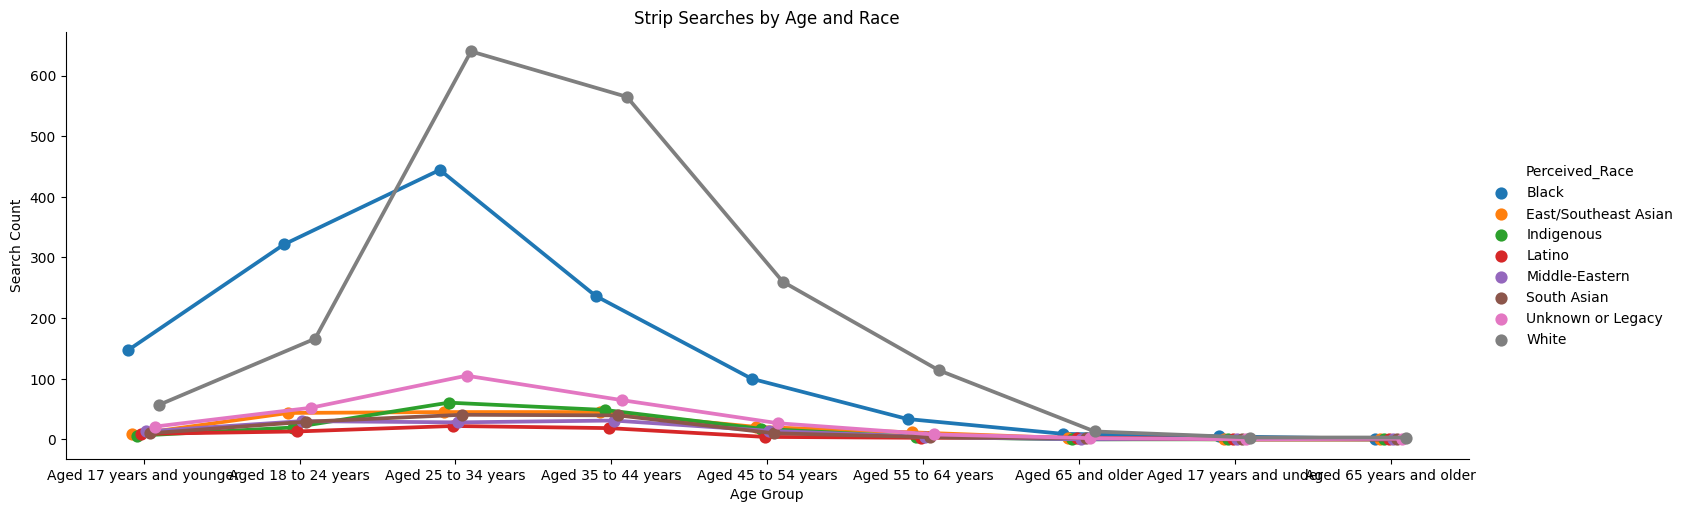

In [ ]:
# plot an interaction plot 
# Create an interaction plot of searches by age and race
plt.figure(figsize=(30, 70))
sns.catplot(x='Age_group__at_arrest_', y='StripSearch', hue='Perceived_Race', kind='point',
            data=strip, aspect=3, ci=None, dodge=True, markers='o')

# Set plot title and axis labels
plt.title('Strip Searches by Age and Race')
plt.xlabel('Age Group')
plt.ylabel('Search Count')

# Show the plot
plt.show()

**Table: "Actions at arrest - Combative, violent or spitter/biter" by race and age group**

In [ ]:
Combative = df1.groupby(['Arrest_Year','Perceived_Race','Age_group__at_arrest_'])['Actions_at_arrest___Combative__','StripSearch'].sum().reset_index()
print(Combative)



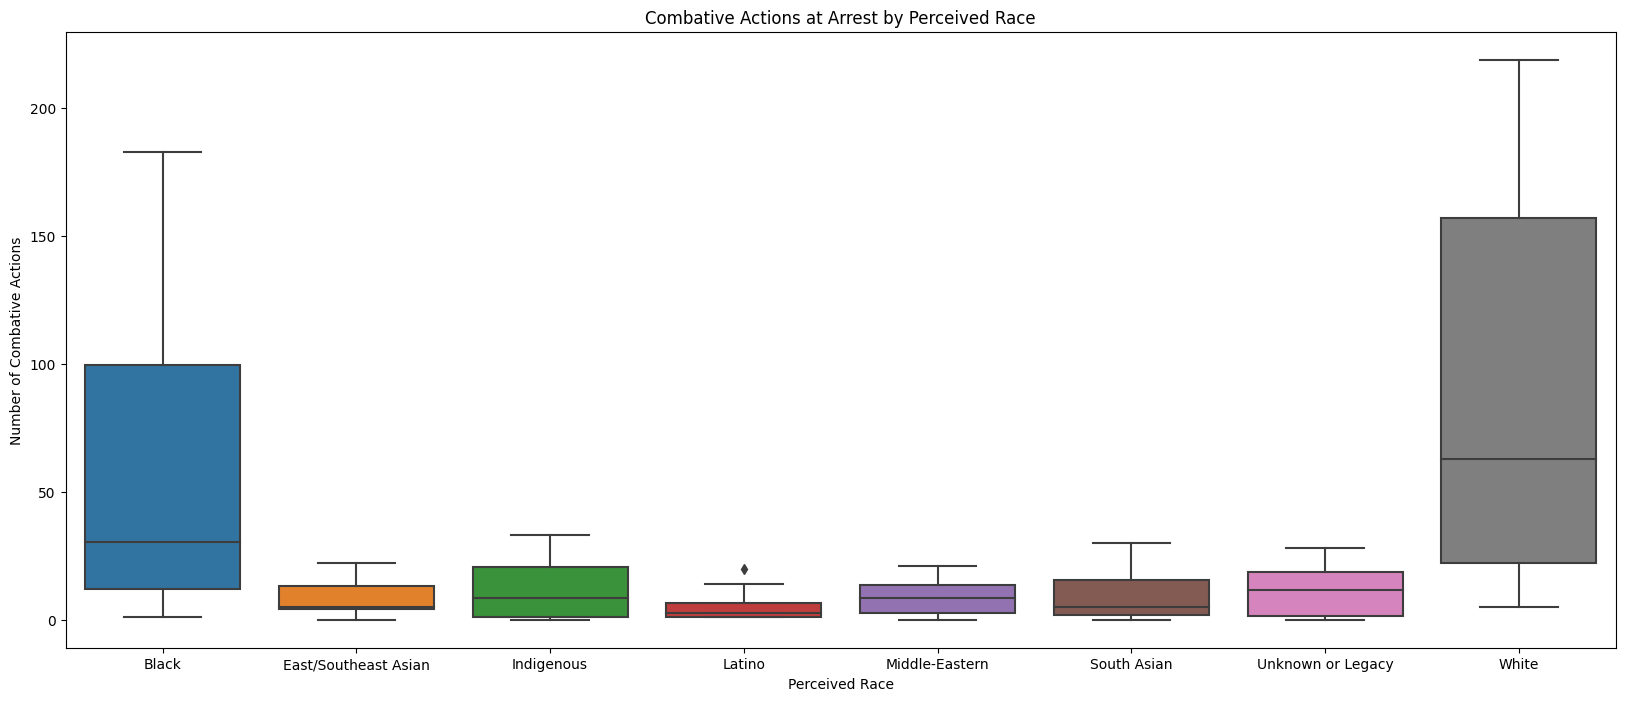

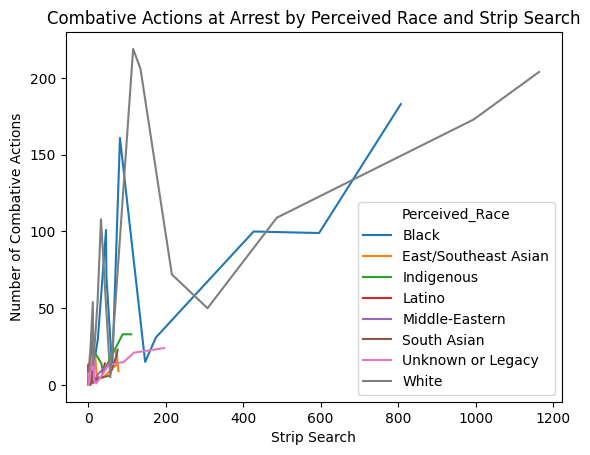

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
sns.boxplot(x='Perceived_Race', y='Actions_at_arrest___Combative__', data=Combative)
plt.title('Combative Actions at Arrest by Perceived Race')
plt.xlabel('Perceived Race')
plt.ylabel('Number of Combative Actions')
plt.show()

sns.lineplot(x='StripSearch', y='Actions_at_arrest___Combative__', hue='Perceived_Race', data=Combative)
plt.title('Combative Actions at Arrest by Perceived Race and Strip Search')
plt.xlabel('Strip Search')
plt.ylabel('Number of Combative Actions')
plt.show()


ANCOVA

In [ ]:
Combative.head()

,Arrest_Year,Perceived_Race,Age_group__at_arrest_,Actions_at_arrest___Combative__,StripSearch
0,2020,Black,Aged 17 years and younger,15,147
1,2020,Black,Aged 18 to 24 years,99,596
2,2020,Black,Aged 25 to 34 years,183,807
3,2020,Black,Aged 35 to 44 years,100,427
4,2020,Black,Aged 45 to 54 years,31,175


In [ ]:
Combative.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Arrest_Year                      112 non-null    int64 
 1   Perceived_Race                   112 non-null    object
 2   Age_group__at_arrest_            112 non-null    object
 3   Actions_at_arrest___Combative__  112 non-null    int64 
 4   StripSearch                      112 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.5+ KB


In [ ]:
ancova(data=Combative, dv='Actions_at_arrest___Combative__', covar='StripSearch', between='Perceived_Race')

,Source,SS,DF,F,p-unc,np2
0,Perceived_Race,29701.822365,7,5.168618,4.546413e-05,0.259953
1,StripSearch,49906.327126,1,60.791792,5.345797e-12,0.371153
2,Residual,84556.672874,103,NaN,NaN,NaN


In [ ]:
ancova(data=Combative, dv='StripSearch', covar='Actions_at_arrest___Combative__', between='Perceived_Race')

,Source,SS,DF,F,p-unc,np2
0,Perceived_Race,4.407819e+03,7,0.037151,9.999335e-01,0.002518
1,Actions_at_arrest___Combative__,1.030374e+06,1,60.791792,5.345797e-12,0.371153
2,Residual,1.745770e+06,103,NaN,NaN,NaN


# Logistic Regression

In [ ]:
df1.head(15)

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5
5,2021,Apr-June,1019145,6060688.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,42,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,6
6,2021,Jan-Mar,1035445,6053833.0,330778,Black,M,Aged 25 to 34 years,Not a youth,52,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,7
7,2021,Jan-Mar,1050464,6063477.0,330778,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,8
8,2021,Jan-Mar,1045486,6053929.0,330778,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,9
9,2021,Apr-June,1012287,6004570.0,330778,Black,M,Aged 25 to 34 years,Not a youth,14,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,10


In [ ]:
#One hot encoding non-numerical features. 
#We will be using a simple label encoder that turns the target labels to values between 0 and n_labelclasses - 1
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
# Transform categorical variables to numerical values and create a new variable 
# to store each of the encoded values
encoder = LabelEncoder()
df1['Month_encoded'] = encoder.fit_transform(df1['Arrest_Month'])
df1['race_encoded'] = encoder.fit_transform(df1['Perceived_Race'])
df1['sex_encoded'] = encoder.fit_transform(df1['Sex'])
df1['age_encoded'] = encoder.fit_transform(df1['Age_group__at_arrest_'])
df1.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId,Month_encoded,race_encoded,sex_encoded,age_encoded
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,NaN,NaN,NaN,NaN,NaN,1,2,7,1,4
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,NaN,NaN,NaN,NaN,NaN,2,2,7,1,4
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,NaN,NaN,NaN,NaN,NaN,3,3,6,1,4
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,NaN,NaN,NaN,NaN,NaN,4,1,0,1,3
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,NaN,NaN,NaN,NaN,NaN,5,1,5,1,3


In [ ]:
#select features
x = df1[['race_encoded', 'sex_encoded', 'age_encoded']]

# Select the response column 
y = df1['Actions_at_arrest___Combative__']

In [ ]:
# Split these data into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,stratify=y, random_state=120)

In [ ]:
#building the model with statsmodels
import statsmodels.formula.api as smf

# Create the formula string 
all_columns = ' + '.join(x)
formula = "Actions_at_arrest___Combative__ ~ " + all_columns 
print("Formula: ", formula, "\n")

# Put the training predictors and responses into one DataFrame to be input into the model
trainingdata = pd.concat([x_train,y_train], axis = 1)

# Build the model
log_reg_1 = smf.logit(formula, data=trainingdata).fit()


In [ ]:
log_reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  Logit Regression Results                                 
===========================================================================================
Dep. Variable:     Actions_at_arrest___Combative__   No. Observations:                52220
Model:                                       Logit   Df Residuals:                    52216
Method:                                        MLE   Df Model:                            3
Date:                             Sun, 16 Apr 2023   Pseudo R-squ.:               0.0001963
Time:                                     16:04:23   Log-Likelihood:                -9444.0
converged:                                    True   LL-Null:                       -9445.9
Covariance Type:                         nonrobust   LLR p-value:                    0.2948
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.0930      0.074    -41.789      0.000      -3.238      -2.948
race_encoded    -0.0107      0.007     -1.500      0.134      -0.025       0.003
sex_encoded     -0.0214      0.054     -0.398      0.691      -0.127       0.084
age_encoded      0.0220      0.015      1.438      0.150      -0.008       0.052
================================================================================
"""

In [ ]:
#Second Method
reg = smf.logit('Actions_at_arrest___Combative__ ~ race_encoded + sex_encoded + age_encoded ', data=trainingdata).fit()
print(reg.summary())

Optimization terminated successfully.
         Current function value: 0.180850
         Iterations 7
                                  Logit Regression Results                                 
Dep. Variable:     Actions_at_arrest___Combative__   No. Observations:                52220
Model:                                       Logit   Df Residuals:                    52216
Method:                                        MLE   Df Model:                            3
Date:                             Sun, 16 Apr 2023   Pseudo R-squ.:               0.0001963
Time:                                     16:04:23   Log-Likelihood:                -9444.0
converged:                                    True   LL-Null:                       -9445.9
Covariance Type:                         nonrobust   LLR p-value:                    0.2948
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------


In [ ]:
#getting odds ratio 
np.exp(reg.params)

Intercept       0.045364
race_encoded    0.989380
sex_encoded     0.978829
age_encoded     1.022220
dtype: float64

In [ ]:
params = reg.params
conf = reg.conf_int()
conf['OR'] = params
conf.columns = ["Lower CI", "Upper CI", "OR"]
np.exp(conf)

,Lower CI,Upper CI,OR
Intercept,0.039238,0.052446,0.045364
race_encoded,0.975671,1.003283,0.989380
sex_encoded,0.880955,1.087577,0.978829
age_encoded,0.992051,1.053307,1.022220


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Predict responses 
pred_1 = log_reg_1.predict(x_test)

# round() rounds to nearest integer;
# 0.5 rounds to 0; 0.501 rounds to 1
prediction_1 = list(map(round, pred_1))

In [ ]:
# Accuracy score
print('\nTest accuracy = ', accuracy_score(y_test, prediction_1))


Test accuracy =  0.9558823529411765


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Confusion matrix
#C0,0 is true negative, C1,0 is false negative, C1,1 is true positive, C0,1 false positive 

cm = confusion_matrix(y_test, prediction_1) 
print ("\nConfusion Matrix : \n", cm) 


Confusion Matrix : 
 [[12480     0]
 [  576     0]]


In [ ]:
classification_decision = (classification_report(y_test, prediction_1))
print(classification_decision)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     12480
           1       0.00      0.00      0.00       576

    accuracy                           0.96     13056
   macro avg       0.48      0.50      0.49     13056
weighted avg       0.91      0.96      0.93     13056



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Power analysis

In [ ]:
#packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import statsmodels
pd.options.display.max_columns = None #show all columns in data

In [ ]:
#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(sample1,sample2):
    #calculate the sample size
    n1, n2 = len(sample1), len(sample2)
    #calculate the variances
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

# function to calculate Cohen's d for independent samples
def Cohens_d(sample1, sample2):
    u1, u2 = np.mean(sample1), np.mean(sample2)
    s_pooled = pooled_standard_deviation(sample1, sample2)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

In [ ]:
#create datasets
Black_race = df1[df1['Perceived_Race']=='Black']
White_race = df1[df1['Perceived_Race']=='White']

B_race = Black_race['Actions_at_arrest___Combative__']
W_race = White_race['Actions_at_arrest___Combative__']

B_race_strip = Black_race['StripSearch']
W_race_strip = White_race['StripSearch']

In [ ]:
#conduct power analysis 
from statsmodels.stats.power import TTestIndPower
effect_size = Cohens_d(B_race,W_race)
alpha = 0.05
power = 0.8
ratio_ =len(B_race)/len(W_race) #NB: ratio = nobs2/nobs1
print('Effect size (Cohen\'s D) for Action at Arrest_Combative:',effect_size)

Effect size (Cohen's D) for Action at Arrest_Combative: 0.006210781660650996


In [ ]:
#conduct power analysis 
from statsmodels.stats.power import TTestIndPower
effect_size = Cohens_d(B_race_strip,W_race_strip)
alpha = 0.05
power = 0.8
ratio_ =len(B_race_strip)/len(W_race_strip) #NB: ratio = nobs2/nobs1
print('Effect size (Cohen\'s D) for Strip Search:',effect_size)

Effect size (Cohen's D) for Strip Search: 0.030225159629175685


In [ ]:
#Action at Combat samples
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for Black race') 
print('Actual size of B_race:', len(B_race))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for White race')
print('Actual size of W_race:', len(W_race))

Sample Size of nobs1: 22182.915 needed for Black race
Actual size of B_race: 17526
Sample Size of nobs2: 14023.655 needed for White race
Actual size of W_race: 27723


In [ ]:
#Strip Search samples
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for Black race') 
print('Actual size of B_race:', len(B_race_strip))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for White race')
print('Actual size of W_race:', len(W_race_strip))

Sample Size of nobs1: 22182.915 needed for Black race
Actual size of B_race: 17526
Sample Size of nobs2: 14023.655 needed for White race
Actual size of W_race: 27723


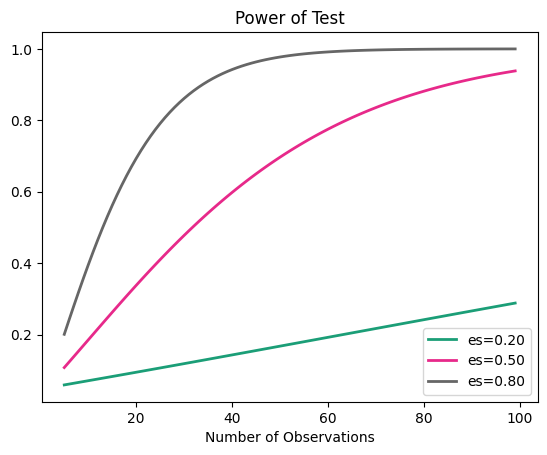

In [ ]:
#Power curve

effect_sizes = np.array([0.2, 0.5, 0.8])
sample_sizes = np.array(range(5, 100))
  
# plot power curves
analysis.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
  
plt.show()